## Mandatory Exercise

In [ ]:
pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.1 MB/s 


In [ ]:
import nltk
import pandas
import svgling
from nltk import CFG, ChartParser
from nltk import BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser

#Grammar with expansion
grammar = CFG.fromstring('''
  S   -> NP VP  NP
  NP  -> NNS | JJ NNS | NP CC NP
  VP  -> V P
  NNS -> "cats" | "mice" | NNS CC NNS 
  JJ  -> "lazy"
  V   -> "play"
  P  -> "with"
  ''')

parser = ChartParser(grammar, trace=1)

In [ ]:
sent = ['lazy', 'cats', 'play', 'with', 'mice']
parse = parser.parse(sent)

|.  lazy .  cats .  play .  with .  mice .|
|[-------]       .       .       .       .| [0:1] 'lazy'
|.       [-------]       .       .       .| [1:2] 'cats'
|.       .       [-------]       .       .| [2:3] 'play'
|.       .       .       [-------]       .| [3:4] 'with'
|.       .       .       .       [-------]| [4:5] 'mice'
|[-------]       .       .       .       .| [0:1] JJ -> 'lazy' *
|[------->       .       .       .       .| [0:1] NP -> JJ * NNS
|.       [-------]       .       .       .| [1:2] NNS -> 'cats' *
|.       [-------]       .       .       .| [1:2] NP -> NNS *
|.       [------->       .       .       .| [1:2] NNS -> NNS * CC NNS
|[---------------]       .       .       .| [0:2] NP -> JJ NNS *
|[--------------->       .       .       .| [0:2] S  -> NP * VP NP
|[--------------->       .       .       .| [0:2] NP -> NP * CC NP
|.       [------->       .       .       .| [1:2] S  -> NP * VP NP
|.       [------->       .       .       .| [1:2] NP -> NP * CC NP
|.       .

# bottomUpChartParser

In [ ]:
bottomUpChartParser = BottomUpChartParser(grammar)
bottomUpChartParserparse = bottomUpChartParser.parse(sent)
bottomUpChartTrees = [t for t in bottomUpChartParserparse]
print(f"bottomUpChart has {bottomUpChartParser.chart_parse(sent).num_edges()} edges")

bottomUpChart has 45 edges


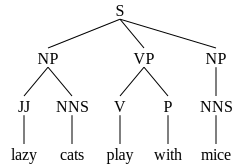

In [ ]:
# Printing the tree
bottomUpChartTrees[0]

In [ ]:
bottomUpChartEdges = bottomUpChartParser.chart_parse(sent)._edge_to_cpls

In [ ]:
bottomUpChartEdges

{[Edge: [0:1] 'lazy']: {(): True},
 [Edge: [1:2] 'cats']: {(): True},
 [Edge: [2:3] 'play']: {(): True},
 [Edge: [3:4] 'with']: {(): True},
 [Edge: [4:5] 'mice']: {(): True},
 [Edge: [0:0] JJ -> * 'lazy']: {(): True},
 [Edge: [0:1] JJ -> 'lazy' *]: {([Edge: [0:1] 'lazy'],): True},
 [Edge: [0:0] NP -> * JJ NNS]: {(): True},
 [Edge: [0:1] NP -> JJ * NNS]: {([Edge: [0:1] JJ -> 'lazy' *],): True},
 [Edge: [1:1] NNS -> * 'cats']: {(): True},
 [Edge: [1:2] NNS -> 'cats' *]: {([Edge: [1:2] 'cats'],): True},
 [Edge: [1:1] NP -> * NNS]: {(): True},
 [Edge: [1:1] NNS -> * NNS CC NNS]: {(): True},
 [Edge: [0:2] NP -> JJ NNS *]: {([Edge: [0:1] JJ -> 'lazy' *],
   [Edge: [1:2] NNS -> 'cats' *]): True},
 [Edge: [1:2] NP -> NNS *]: {([Edge: [1:2] NNS -> 'cats' *],): True},
 [Edge: [1:2] NNS -> NNS * CC NNS]: {([Edge: [1:2] NNS -> 'cats' *],): True},
 [Edge: [1:1] S  -> * NP VP NP]: {(): True},
 [Edge: [1:1] NP -> * NP CC NP]: {(): True},
 [Edge: [1:2] S  -> NP * VP NP]: {([Edge: [1:2] NP -> NNS *],):

# bottomUpLeftCornerChartParser

In [ ]:
bottomUpLeftCornerChartParser = BottomUpLeftCornerChartParser(grammar)
bottomUpLeftCornerChartParserparse = bottomUpLeftCornerChartParser.parse(sent)
bottomUpLeftCornerChartTrees = [t for t in bottomUpLeftCornerChartParserparse]
print(f"bottomUpLeftCornerChart has {bottomUpLeftCornerChartParser.chart_parse(sent).num_edges()} number of edges" )

bottomUpLeftCornerChart has 28 number of edges


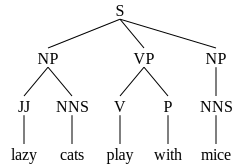

In [ ]:
# Printing the tree
bottomUpLeftCornerChartTrees[0]

In [ ]:
# Getting the list of explored edges
bottomUpLeftCornerChartEdges = bottomUpLeftCornerChartParser.chart_parse(sent)._edge_to_cpls

In [ ]:
# Printing the list of explored edges
bottomUpLeftCornerChartEdges

{[Edge: [0:1] 'lazy']: {(): True},
 [Edge: [1:2] 'cats']: {(): True},
 [Edge: [2:3] 'play']: {(): True},
 [Edge: [3:4] 'with']: {(): True},
 [Edge: [4:5] 'mice']: {(): True},
 [Edge: [0:1] JJ -> 'lazy' *]: {([Edge: [0:1] 'lazy'],): True},
 [Edge: [0:1] NP -> JJ * NNS]: {([Edge: [0:1] JJ -> 'lazy' *],): True},
 [Edge: [1:2] NNS -> 'cats' *]: {([Edge: [1:2] 'cats'],): True},
 [Edge: [1:2] NP -> NNS *]: {([Edge: [1:2] NNS -> 'cats' *],): True},
 [Edge: [1:2] NNS -> NNS * CC NNS]: {([Edge: [1:2] NNS -> 'cats' *],): True},
 [Edge: [0:2] NP -> JJ NNS *]: {([Edge: [0:1] JJ -> 'lazy' *],
   [Edge: [1:2] NNS -> 'cats' *]): True},
 [Edge: [0:2] S  -> NP * VP NP]: {([Edge: [0:2] NP -> JJ NNS *],): True},
 [Edge: [0:2] NP -> NP * CC NP]: {([Edge: [0:2] NP -> JJ NNS *],): True},
 [Edge: [1:2] S  -> NP * VP NP]: {([Edge: [1:2] NP -> NNS *],): True},
 [Edge: [1:2] NP -> NP * CC NP]: {([Edge: [1:2] NP -> NNS *],): True},
 [Edge: [2:3] V  -> 'play' *]: {([Edge: [2:3] 'play'],): True},
 [Edge: [2:3] VP 

# leftCornerChartParser

In [ ]:
leftCornerChartParser = LeftCornerChartParser(grammar)
leftCornerChartParserparse = leftCornerChartParser.parse(sent)
leftCornerChartTrees = [t for t in leftCornerChartParserparse]
print(f"leftCornerChart has {leftCornerChartParser.chart_parse(sent).num_edges()} number of edges")

leftCornerChart has 22 number of edges


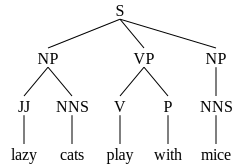

In [ ]:
# Printing the tree
leftCornerChartTrees[0]

In [ ]:
# Getting the list of explored edges
lCChartParserEdges = leftCornerChartParser.chart_parse(sent)._edge_to_cpls

In [ ]:
# Printing the list of explored edges
lCChartParserEdges

{[Edge: [0:1] 'lazy']: {(): True},
 [Edge: [1:2] 'cats']: {(): True},
 [Edge: [2:3] 'play']: {(): True},
 [Edge: [3:4] 'with']: {(): True},
 [Edge: [4:5] 'mice']: {(): True},
 [Edge: [0:1] JJ -> 'lazy' *]: {([Edge: [0:1] 'lazy'],): True},
 [Edge: [0:1] NP -> JJ * NNS]: {([Edge: [0:1] JJ -> 'lazy' *],): True},
 [Edge: [1:2] NNS -> 'cats' *]: {([Edge: [1:2] 'cats'],): True},
 [Edge: [1:2] NP -> NNS *]: {([Edge: [1:2] NNS -> 'cats' *],): True},
 [Edge: [0:2] NP -> JJ NNS *]: {([Edge: [0:1] JJ -> 'lazy' *],
   [Edge: [1:2] NNS -> 'cats' *]): True},
 [Edge: [0:2] S  -> NP * VP NP]: {([Edge: [0:2] NP -> JJ NNS *],): True},
 [Edge: [1:2] S  -> NP * VP NP]: {([Edge: [1:2] NP -> NNS *],): True},
 [Edge: [2:3] V  -> 'play' *]: {([Edge: [2:3] 'play'],): True},
 [Edge: [2:3] VP -> V * P]: {([Edge: [2:3] V  -> 'play' *],): True},
 [Edge: [3:4] P  -> 'with' *]: {([Edge: [3:4] 'with'],): True},
 [Edge: [2:4] VP -> V P *]: {([Edge: [2:3] V  -> 'play' *],
   [Edge: [3:4] P  -> 'with' *]): True},
 [Edge

# Conclusion

1. The number of explored edges for each strategy is:
*   bottomUpChartParser: 45
*   bottomUpLeftCornerChartParser: 28
*   leftCornerChartParser: 23

   Thus, due to the lowest number of edges to explore, the leftCornerChartParser is the most efficient parser.

2. Related to the filtering of edges:
* The bottomUpChartParser strategy filters no edges.
  In this approach, the starting point is the input string and from that is tried to combine words recurring to grammar rules. So any combinations that are possible are considered, independent of the sequence we might be looking for. Thus, no edges are filtered in the process.
* The bottomUpLeftCornerChartParser filters out edges without any word subsumption.
  BottomUpLeftCornerChartParser filters out edges without any word subsumption because the word exploration is executed from the left level by level.
* The leftCornerChartParser is filtering out edges
without new word subsumptions.
  In leftCornerChartParser, there is a combination of bottom-up and top-down strategies, which allows for some filtering. In this strategy, the bottom-up process is conducted normally accordingly to a given rule, however, if the left corner recognizes that a node k1 is satisfactory, then the dominant nodes of k1 and the remaining ones are predicted through a top-down approach.






# Optional exercise

In [ ]:
import nltk
import spacy
nlp = spacy.load('en_core_web_sm')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Getting the file STS.input.SMTeuroparl.txt from drive into a DataFrame
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
dt = pd.read_csv('/content/drive/MyDrive/test-gold/test-gold/STS.input.SMTeuroparl.txt',sep='\t',header=None)
# Updating the DataFrame with a new column with STS.gs.SMTeuroparl.txt
dt['gs'] = pd.read_csv('/content/drive/MyDrive/test-gold/test-gold/STS.gs.SMTeuroparl.txt',sep='\t',header=None)

Mounted at /content/drive


In [ ]:
import re
# Getting a list of stop words
nltk.download('stopwords')
stopWordSet = set(nltk.corpus.stopwords.words('english'))

# Cleaning the words
def cleaner (sentenceList):
  
  # Filtering the ponctuation and stop words
  sentenceList = list(filter(lambda word : re.search('''[!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~]+''', word[0]) == None and word[0] not in stopWordSet, sentenceList))

  return sentenceList

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.metrics import jaccard_distance
import numpy as np

limit = len(dt[0][:])

for id in range(limit):
  
  dependesies1, dependesies2 = nlp(dt.loc[id,0]), nlp(dt.loc[id,1])

  # Triples as individual tokens:
  tripleTokens1 = np.array([[token.text.lower(), token.tag_, token.dep_] for token in dependesies1])
  tripleTokens1 = tripleTokens1.reshape(tripleTokens1.shape[0]*tripleTokens1.shape[1])
  tripleTokens2 = np.array([[token.text.lower(), token.tag_, token.dep_] for token in dependesies2])
  tripleTokens2 = tripleTokens2.reshape(tripleTokens2.shape[0]*tripleTokens2.shape[1])
  
  # Cleaning 
  cleanedText1, cleanedText2 = cleaner(tripleTokens1), cleaner(tripleTokens2)

  #Triples as concatinated words:
  tripleConcatinations1 = np.array([str([token.text.lower(), token.tag_, token.dep_]) for token in dependesies1])
  tripleConcatinations2 = np.array([str([token.text.lower(), token.tag_, token.dep_]) for token in dependesies2])

  # Updating the DataFrame with the similarities according to the method jaccard 
  dt.loc[id,'Dependency triples individual'] = jaccard_distance(set(cleanedText1), set(cleanedText2))
  dt.loc[id,'Dependency triples combined'] = jaccard_distance(set(tripleConcatinations1), set(tripleConcatinations2))

In [ ]:
display(dt)

,0,1,gs,Dependency triples individual,Dependency triples combined
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.500,0.485714,0.758621
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.000,0.136364,0.333333
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.250,0.346154,0.720000
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.500,0.315789,0.400000
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.000,0.000000,0.000000
...,...,...,...,...,...
454,It is our job to continue to support Latvia wi...,It is of our duty of continue to support the c...,5.000,0.307692,0.450000
455,The vote will take place today at 5.30 p.m.,Vote will take place at 17 h 30.,4.750,0.409091,0.615385
456,Neither was there a qualified majority within ...,There was no qualified majority in this Parlia...,5.000,0.366667,0.500000
457,Let me remind you that our allies include ferv...,"I hold you recall that our allies, there are e...",4.000,0.400000,0.791667


In [ ]:
from scipy.stats import pearsonr

# Get the correlation and the p-value between gs and jaccard
corr, p = pearsonr(dt['gs'], dt['Dependency triples individual'])
print("Dependency triples as individual tokens -> Correlation coefficient:", corr)
print("p-value:", p)


corr, p = pearsonr(dt['gs'], dt['Dependency triples combined'])
print("\nDependency triples as combined tokens -> Correlation coefficient:", corr)
print("p-value:", p)


Dependency triples as individual tokens -> Correlation coefficient: -0.3920083268561939
p-value: 2.607070806691781e-18

Dependency triples as combined tokens -> Correlation coefficient: -0.423509761438787
p-value: 2.1109571758280608e-21


# **Conclusion:**

In the code, triples from CoreNLPDependencyParserit are used in order to obtain the Jaccard Similarity and the Pearson Correlation.

This implementation uses two different versions. Firstly, the sentences to be compared are expanded with tags and representations of their dependencies. This way in the comparison, similar tags and dependencies between sentences will lean towards a smaller Jaccard distance and a better similarity.

The other implementation combines the root words, tags, and dependencies. This means that each triple is compared with the other. This should make the similarity, in general, lower, because the exact same triples need to match. However, this will also avoid false similarities and potentially increase the correlation.

The result shows that this approach isolated doesn't increase the correlation to the gold standard. As an example, in an earlier version of the code, where the synsets were used, the correlation was -0.514. In this case, dependency triples as individual tokens gave as low as -0.392, while Dependency triples as combined tokens were slightly better but still worse, with a correlation of -0.424. During the testing, different combinations of doubles instead of triples have been tested, but no improvement in the results was registered.

The reason for the poor outcome might be due to the fact that the dependencies of words isolated don't indicate if the meaning of a sentence is similar to another. 

NEs and dependencies might be a reasonable tool to detect similarities between sentences, but it has to be combined with other methods. For instance, it can be used to combine words into larger meanings.